In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_excel('03_FRESH15.xls')
print(df.head())
print(df.info())
print(df.isnull().sum())

  SEX  WTSEP  WTAPR  BMISP  BMIAP
0   M     72     59  22.02  18.14
1   M     97     86  19.70  17.44
2   M     74     69  24.09  22.43
3   M     93     88  26.97  25.57
4   F     68     64  21.51  20.10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEX     67 non-null     object 
 1   WTSEP   67 non-null     int64  
 2   WTAPR   67 non-null     int64  
 3   BMISP   67 non-null     float64
 4   BMIAP   67 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.7+ KB
None
SEX      0
WTSEP    0
WTAPR    0
BMISP    0
BMIAP    0
dtype: int64


In [33]:
# Dữ liệu
df_male = df[df['SEX'] == 'M']
df_female = df[df['SEX'] == 'F']

# Tính trung bình, độ lệch chuẩn và số lượng mẫu cho cả nam và nữ
mean_male = df_male['BMISP'].mean()
std_male = df_male['BMISP'].std()
n_male = len(df_male)

mean_female = df_female['BMISP'].mean()
std_female = df_female['BMISP'].std()
n_female = len(df_female)

# Tính khoảng tin cậy 95% cho BMI của nam
t_critical = stats.t.ppf(0.975, df=n_male-1)  # t-crit cho 95% CI
CI_male = (mean_male - t_critical * (std_male / (n_male**0.5)),
           mean_male + t_critical * (std_male / (n_male**0.5)))

# Tính khoảng tin cậy 95% cho BMI của nữ
CI_female = (mean_female - t_critical * (std_female / (n_female**0.5)),
             mean_female + t_critical * (std_female / (n_female**0.5)))

# In kết quả
print(f"Khoảng tin cậy 95% cho BMI tháng 9 của nam: ({CI_male[0]:.2f}, {CI_male[1]:.2f})")
print(f"Khoảng tin cậy 95% cho BMI tháng 9 của nữ: ({CI_female[0]:.2f}, {CI_female[1]:.2f})")

Khoảng tin cậy 95% cho BMI tháng 9 của nam: (21.34, 23.92)
Khoảng tin cậy 95% cho BMI tháng 9 của nữ: (20.45, 22.51)


In [34]:
# Tỷ lệ người có cân nặng tăng trong nhóm nữ
increased_weight = len(df_female[df_female['WTAPR'] > df_female['WTSEP']])
total_female = len(df_female)

p = increased_weight / total_female

# Tính z cho 90% CI
z_critical = stats.norm.ppf(0.95)

# Tính khoảng tin cậy 90% cho tỷ lệ
CI_ratio = (p - z_critical * ( (p * (1 - p)) / total_female )**0.5,
            p + z_critical * ( (p * (1 - p)) / total_female )**0.5)

# In kết quả
print(f"Tỷ lệ người có cân nặng tăng trong nhóm nữ: {p:.2f}")
print(f"Khoảng tin cậy 90% cho tỷ lệ người có cân nặng tăng: ({CI_ratio[0]:.2f}, {CI_ratio[1]:.2f})")

Tỷ lệ người có cân nặng tăng trong nhóm nữ: 0.66
Khoảng tin cậy 90% cho tỷ lệ người có cân nặng tăng: (0.53, 0.79)


In [42]:
# Kiểm định t với H0: BMI tháng 9 = 22
t_stat, p_value = stats.ttest_1samp(df['BMISP'], 22)
# Kiểm định một phía
p_value_one_sided = p_value / 2

# In kết quả
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value (1 phía): {p_value_one_sided:.4f}")

T-statistic: 0.07
P-value (1 phía): 0.4705


In [43]:
# Kiểm định t cặp cho BMI tháng 9 và tháng 4
t_stat_paired, p_value_paired = stats.ttest_rel(df['BMISP'], df['BMIAP'])

# In kết quả
print(f"T-statistic (cặp): {t_stat_paired:.2f}")
print(f"P-value (cặp): {p_value_paired:.4f}")

T-statistic (cặp): -2.95
P-value (cặp): 0.0044


In [46]:
# Giả sử chúng ta có 50 người có BMI giảm trong tổng số 200 người
count = 50  # Số lượng người có BMI giảm
nobs = 200  # Tổng số người

# Kiểm định tỷ lệ H0: tỷ lệ = 50% và kiểm tra xem tỷ lệ có lớn hơn 50% không
p_value = stats.binom_test(count, nobs, p=0.5, alternative='greater')

print(f"P-value: {p_value:.4f}")

AttributeError: module 'scipy.stats' has no attribute 'binom_test'

In [39]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Dự đoán BMI tháng 9 theo cân nặng tháng 9
X = df['WTSEP'].values.reshape(-1, 1)  # Cân nặng tháng 9
y = df['BMISP'].values  # BMI tháng 9

model = LinearRegression()
model.fit(X, y)

# Tính R^2
r2 = model.score(X, y)

# In kết quả
print(f"Hệ số hồi quy (slope): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"R-squared: {r2:.4f}")

Hệ số hồi quy (slope): 0.19
Intercept: 9.95
R-squared: 0.4013


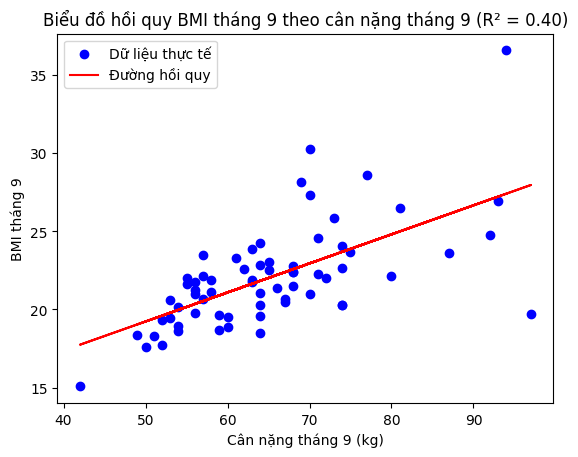

In [40]:
# Vẽ biểu đồ hồi quy
plt.scatter(df['WTSEP'], df['BMISP'], color='blue', label='Dữ liệu thực tế')
plt.plot(df['WTSEP'], model.predict(X), color='red', label='Đường hồi quy')
plt.xlabel('Cân nặng tháng 9 (kg)')
plt.ylabel('BMI tháng 9')
plt.legend()
plt.title(f'Biểu đồ hồi quy BMI tháng 9 theo cân nặng tháng 9 (R² = {r2:.2f})')
plt.show()

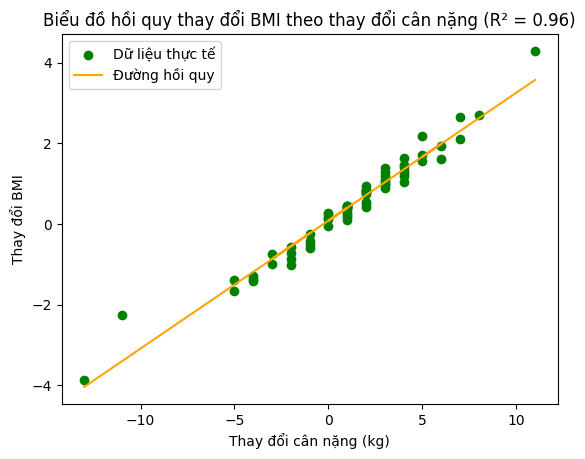

In [41]:
# Tính thay đổi BMI và thay đổi cân nặng
df['BMI_change'] = df['BMIAP'] - df['BMISP']
df['WT_change'] = df['WTAPR'] - df['WTSEP']

# Dự đoán thay đổi BMI theo thay đổi cân nặng
X_change = df['WT_change'].values.reshape(-1, 1)
y_change = df['BMI_change'].values

model_change = LinearRegression()
model_change.fit(X_change, y_change)

r2_change = model_change.score(X_change, y_change)

# Vẽ biểu đồ hồi quy
plt.scatter(df['WT_change'], df['BMI_change'], color='green', label='Dữ liệu thực tế')
plt.plot(df['WT_change'], model_change.predict(X_change), color='orange', label='Đường hồi quy')
plt.xlabel('Thay đổi cân nặng (kg)')
plt.ylabel('Thay đổi BMI')
plt.legend()
plt.title(f'Biểu đồ hồi quy thay đổi BMI theo thay đổi cân nặng (R² = {r2_change:.2f})')
plt.show()

In [7]:
# Tách dữ liệu theo giới tính
df_male = df[df['SEX'] == 'M']
df_female = df[df['SEX'] == 'F']

# Tính trung bình, độ lệch chuẩn và số lượng mẫu
mean_male = df_male['BMISP'].mean()
std_male = df_male['BMISP'].std()
n_male = len(df_male)

mean_female = df_female['BMISP'].mean()
std_female = df_female['BMISP'].std()
n_female = len(df_female)

# Tính khoảng tin cậy 95% cho BMI tháng 9
t_critical_male = stats.t.ppf(0.975, df=n_male-1)
CI_male = (mean_male - t_critical_male * (std_male / (n_male**0.5)),
           mean_male + t_critical_male * (std_male / (n_male**0.5)))

t_critical_female = stats.t.ppf(0.975, df=n_female-1)
CI_female = (mean_female - t_critical_female * (std_female / (n_female**0.5)),
             mean_female + t_critical_female * (std_female / (n_female**0.5)))

# In kết quả
print(f"Khoảng tin cậy 95% cho BMI tháng 9 của nam:  ({CI_male[0]:.2f}, {CI_male[1]:.2f})")
print(f"Khoảng tin cậy 95% cho BMI tháng 9 của nữ: {CI_female}")

Khoảng tin cậy 95% cho BMI tháng 9 của nam:  (21.34, 23.92)
Khoảng tin cậy 95% cho BMI tháng 9 của nữ: (np.float64(20.45605487973), np.float64(22.508516548841424))
